In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Naive Bayes Classifier

Bayes' rule:
\begin{equation}
P(y|X) = \frac{P(X|y) \cdot P(y)}{P(X)}
\end{equation}

For various features we get:
\begin{equation}
P(y|x_1, x_2, ..., x_n) = \frac{P(x_1|y)P(x_2|y)...P(x_n|y)P(y)}{P(x_1)P(x_2)...P(x_n)}
\end{equation}

__This equation is derived assuming that the features are independent__.

During the training all of the necessary probabilities are calculated and are just substituted later on the test dataset.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$

Multinomial Naive Bayes:
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

Bernoulli Naive Bayes:
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

Gaussian Naive Bayes:
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

More on: https://www.hackerearth.com/blog/developers/introduction-naive-bayes-algorithm-codes-python-r/

__Example description__: To classify e-mails as spam or not based on the words that appear in the text.

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.9895287958115183

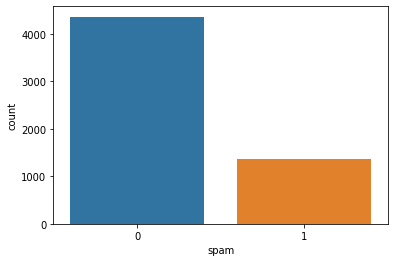

In [6]:
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB

df = pd.read_csv('emails.csv')
df.tail()

sns.countplot(df['spam'])

# Count vectorizer is used to convert a collection of text to a vector of counts (extracting features from text)
# The features are unique words present in each message and the counts are the number of times they appear in each message

vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(X, df['spam'], test_size = 0.2)

model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)


In [7]:
#print(vectorizer.get_feature_names())
#X.shape()

__Example description__: To classify the wine according to its properties 

In [8]:
from sklearn.datasets import load_wine

wine = load_wine()
dir(wine)
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target

df.head()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.2)

model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


GaussianNB(priors=None, var_smoothing=1e-09)

0.9722222222222222

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.8888888888888888

Notice that the GaussianNB has a better performance because the feature values are not discrete